In [1]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch


data = {
    "Adson": [3, 3, 4, 7],
    "Andre Santos": [3, 0, 1, 2],
    "Cleyton": [4, 1, 0, 1],
    "Edgar Neto": [2, 2, 1, 0]
}


df = pd.DataFrame(data, index=["Adson", "Andre Santos", "Cleyton", "Edgar Neto"])
df

,Adson,Andre Santos,Cleyton,Edgar Neto
Adson,3,3,4,2
Andre Santos,3,0,1,2
Cleyton,4,1,0,1
Edgar Neto,7,2,1,0


<ipython-input-32-48d9b341e68c>:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for receiver, num_passes in passes.iteritems():


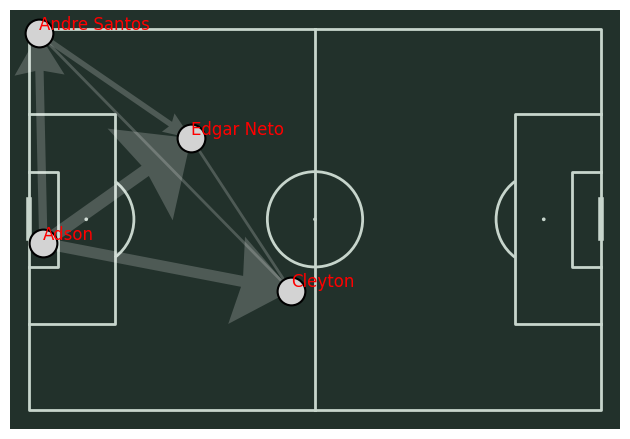

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch


data = {
    "Adson": [3, 3, 4, 7],
    "Andre Santos": [3, 0, 1, 2],
    "Cleyton": [4, 1, 0, 1],
    "Edgar Neto": [2, 2, 1, 0]
}


df = pd.DataFrame(data, index=["Adson", "Andre Santos", "Cleyton", "Edgar Neto"])

# Posições dos jogadores no campo (valores fictícios)
positions = {
    "Adson": (3, 45),
    "Andre Santos": (2, 1),
    "Cleyton": (55, 55),
    "Edgar Neto": (34, 23)
}

# Cria um gráfico não direcionado vazio
G = nx.Graph()

# Adiciona arestas com pesos ao gráfico
for sender, passes in df.iterrows():
    for receiver, num_passes in passes.iteritems():
        if not pd.isna(num_passes):  # Ignora os valores NaN
            # Se a aresta já existe, soma os pesos
            if G.has_edge(sender, receiver):
                G[sender][receiver]['weight'] += num_passes
            else:
                G.add_edge(sender, receiver, weight=num_passes)

# Cria o campo de futebol
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw()

# Desenha as setas para os passes
for edge in G.edges(data=True):
    sender = edge[0]
    receiver = edge[1]
    weight = edge[2]['weight']
    if weight > 0:  # Adiciona esta linha
        pitch.arrows(positions[sender][0], positions[sender][1], positions[receiver][0], positions[receiver][1],
                     width=weight, headwidth=weight, color='w', ax=ax, zorder=1, alpha=.2)

# Desenha os nós para os jogadores
for node, position in positions.items():
    pitch.scatter(position[0], position[1], s=400, color='#d3d3d3', edgecolors='black', linewidth=1.5, alpha=1, zorder=1, ax=ax)
    plt.text(position[0], position[1], node, color="red",fontsize=12, va='bottom')

plt.show()
